## Clustering Template

* Obtain all the required libraries for basic regression template.
* Libraries for
    * Data Analysis - Numpy, Pandas
    * Machine Learning Libraries - Sklearn
    * Data Visualization - Plotly

In [1]:
# Import all dependencies required for the problem.
from __future__ import print_function
from plotly.offline import iplot, init_notebook_mode

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
# Set a Seed for random number generation for reproducible results
init_notebook_mode(connected=True)
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Load and preview the Dataset

* Read the dataset from the required format.
* Preview the dataset which is loaded

In [3]:
# Load the titanic dataset using Pandas library 
df = pd.read_csv('../../data/assignment/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Split the dataset into "what it should learn from"
* "What needs to be predicted" - Dependent Variables, Target Variables, x

In [7]:
X = df.loc[:,['Age', 'Spending Score (1-100)']].values

## Select the Machine Learning Model and train the same
* Select Machine Learning Model
    * http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Train the Machine Learning Model, run the fit method with the training data
* Change the Parameters to make the accuracy better
* Change the num_clusters param to obtain better accuracy 


In [14]:
# Try out other models, and improve accuracy
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

## Evaluate the model for accuracy
* Obtain the Sum of squared errors.
* Smaller the Sum of squared errors the better (Improve Accuracy by reducing your error less than 75949)
* But increasing the number of clusters will always reduce the error rate as eventually each node becomes a cluster.
* So have a look at the plot to also see when the clusters seem close and well made than just increasing the clusters.

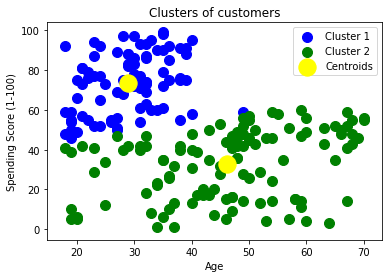

Sum of squared distances: 75949.15601023017


In [15]:
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i in range(num_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = color_list[i], label = 'Cluster {}'.format(i + 1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
print("Sum of squared distances: {}".format(kmeans.inertia_))